# Zeta Disease Analysis for Pluralsight

##### Author: **Scott Grenestedt**  <br>Date: September 23, 2022  


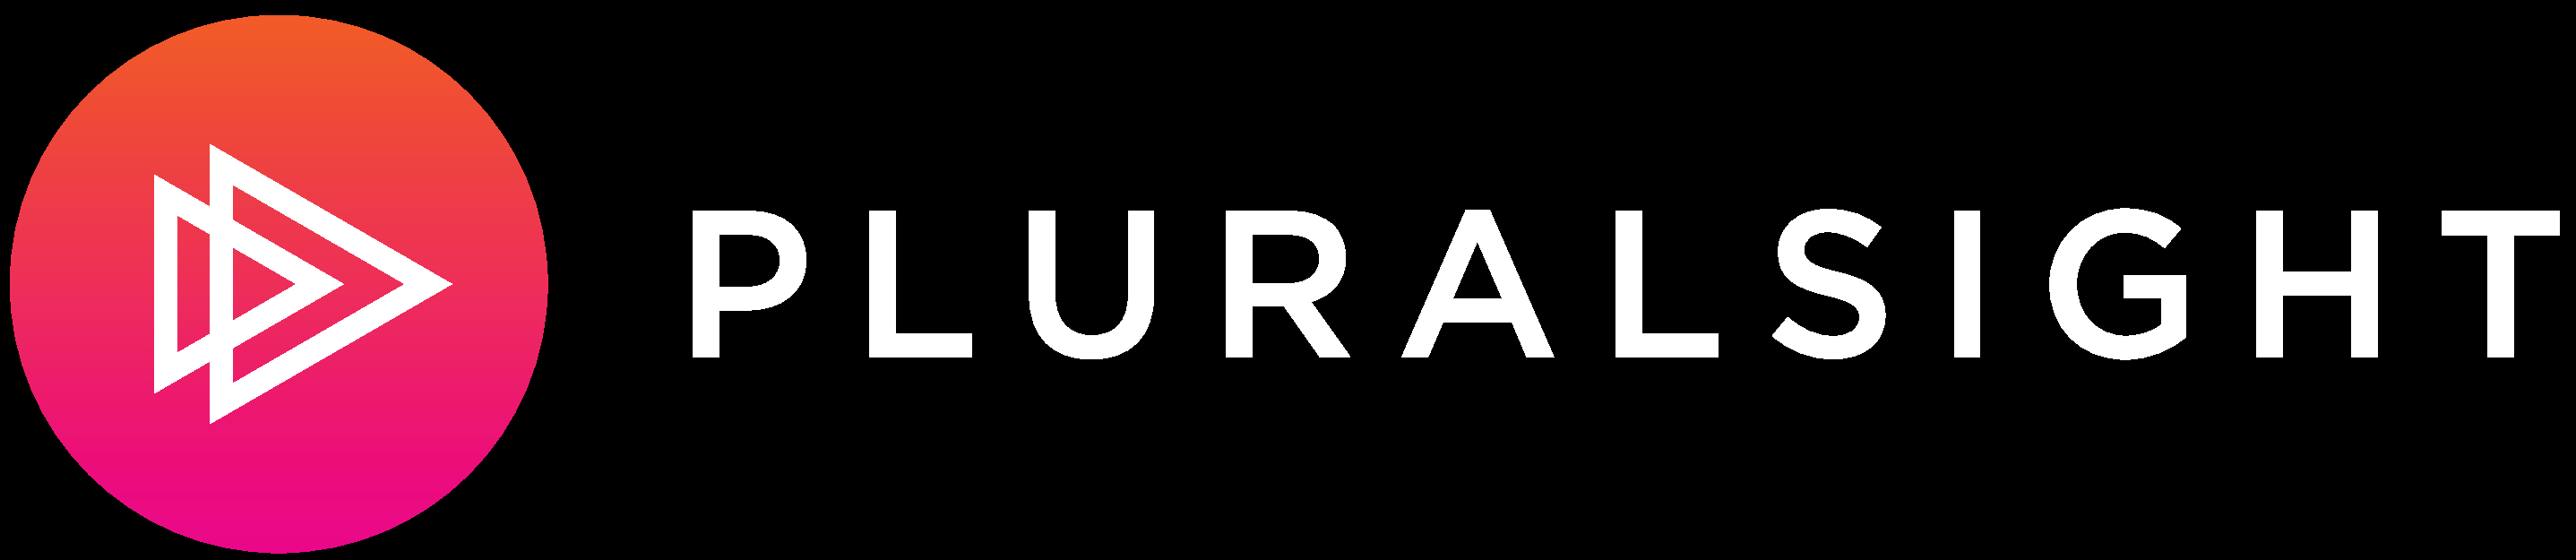

#### Hello everyone, <br><br><br>   My name is **Scott Grenestedt** and today I will be taking you through my Jupyter Notebook containing the following: <br>

**Part 1: Exploratory Data analysis (EDA):**
1. Overview of features/independent variables
2. Generating plots to visualize trends and correlations

**Part 2: Data cleaning and Feature Engineering:**
1. Adding any new features
2. Removing features that are deemed to have low predictive power and/or autocorrelation with other features
3. Normalizing Features if needed (e.g. converting lbs to kilograms, placing values on a [0,1] scale, etc)

**Part 3: Predictive Modeling**
1. Running Machine Learning Algorithms 
2. Assessing the Model
3. Final Predictions

**Part 4: Evaluating the Model (Tweaking if Necessary)**

### Importing Libraries


In [1]:
#Note: The majority of libraries will be imported here, but some statistical/modeling packages will be imported later to make it more clear WHERE they are used

#math and data cleaning libraries
import numpy as np
import pandas as pd



#plotting libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

#Configuring settings for plots
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
#Inline plotting ensures that plots will appear in my Jupyter Notebook)
%matplotlib inline 

#### Importing Training data and Testing data

In [2]:
training_data = pd.read_excel('/Users/Scott/Downloads/zeta_training_data.xlsx')
initial_training_data_copy = training_data
#The second dataframe I'm creating here is simply a copy of the UNALTERED training data. 
#Perhaps it will be of use later to compare it to the training_data once it has been manipulated.
model_testing_data  = pd.read_excel('/Users/Scott/Downloads/zeta_prediction_testing_data.xlsx')

#The third dataframe 'model_testing_data' only contains 20 observations, of which the zeta_disease column is unlabeled for each row. 

# Part 1 of Zeta Disease Project: Exploratory Data Analysis (EDA)

### Data Columns: 
1. **Age:** In Years
2. **Weight:** Body weight in pounds (lbs)
3. **BMI:** Body mass index (weight in KG/(height in Meters*2)
4. **Blood_pressure:** Resting blood pressure (mm Hg) i.e. millimetres of Mercury
5. **Insulin_test:** Insuling test value 
6. **liver_stress_test:** liver_stress_test value
7. **cardio_stress_test:** cardio_stress_test value 
8. **years_smoking:** Number of years smoking
9. **zeta_disease:** 1 = YES; 0 = NO


### Important nuances to note about the data columns: 

- The weight is in pounds, while the BMI uses kg/(2*meters), so it may be useful to switch the lbs to kilograms so that all values are metric.<br> 
- Consider getting rid of BMI and using algebra to extract the height in meters and use it as a new feature.

##### Also Note: The dependent variable 'zeta_disease' is a BINARY outcome, and can thus ONLY take on values of 1 (disease is present) and 0 (no disease).
<br><br>

In [3]:
#getting a quick overview of the training data to make sure that the column names are the same as the ones in the problem description
training_data.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [4]:
#Getting an overview of the testing data; verifying that zeta_disease column shows 'NaN' to indicate there is Not a Number in that column yet. 
model_testing_data.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24.0,151.0,39.5,69.0,72.0,1.3968,56.0,4.0,NaN
1,27.0,179.0,35.5,89.0,156.0,1.6608,43.0,6.0,NaN
2,34.0,147.0,26.9,76.0,74.0,1.6958,53.0,2.0,NaN
3,35.0,206.0,32.4,73.0,127.0,1.4608,61.0,6.0,NaN
4,60.0,193.0,29.8,62.0,192.0,1.7798,65.0,9.0,NaN


In [5]:
#Checking for null values 
training_data.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

We can see from the above output that there are NO Null values in any columns of our training data set <br>
- This will be investigated in more detail later.
    - I want to answer questions like: 'Rather than Null values, have zeros been used as placeholders when data was not collected?'

##### <br>How many test subjects have the disease?

<AxesSubplot:title={'center':'Training data Zeta_disease count'}, xlabel='zeta_disease', ylabel='count'>

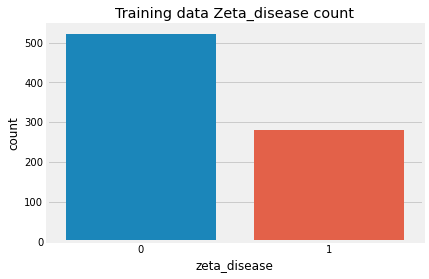

In [6]:
plt.figure(figsize=(6,4))
plt.title('Training data Zeta_disease count')          
sns.countplot('zeta_disease', data=training_data)


In [7]:
training_data.zeta_disease.value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

In [8]:
521/800, 1-(521/800)

(0.65125, 0.34875)

##### Here we can see that 521 of the 800 people did **NOT** have the disease, while 279 **DID** have the disease. These figures represent 65.125% and 34.875% respectively

##### Lets take a deeper dive to see what features i.e. independent variables are most strongly associated with carrying the disease

In [9]:
#Printing the head of the training_data to see the columns once again and the structure of the data
training_data.head(3)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0


In [10]:
#Simple Loop to print out the datatype of each feature variable
for i in training_data.columns:
    print(training_data[i].dtype)

int64
int64
float64
int64
int64
float64
int64
int64
int64


All of the columns in our data are **numerical** values. Some are continous, i.e. the variable can take on any value within the range of the data such as weight and liver_stress_test, while other variables are limited to integers such as years of smoking and age

##### Here I will create and visualize a correlation matrix. A heatmap is an effective visual tool to quickly see large and small correlation numbers, whereas simply outputting raw values may be less insightful

In [11]:
correlation_matrix = training_data.corr()

<AxesSubplot:>

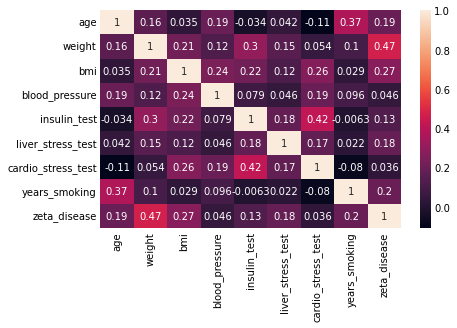

In [12]:
sns.heatmap(correlation_matrix, annot =True)

An observation that I can make from viewing this Correlation matrix is that of the 8 feature variables, **'Weight'** has the highest positive correlation with the **dependent/outcome** variable **'zeta_disease'**. The correlation value is 0.47, which is still not considered *particularly high*. <br>Furthermore, we can note that there are no features that have *very high* positive **OR** negative correlation with one another, which is generally a good thing. <br> This characteristic indicates a lack of autocorrelation amongst feature variables, which is a key assumption made by the logistic regression model that I will use and explain later
. 

##### One final takeaway that I have observed from the correlation matrix is that some of the features such as blood_pressure and cardio_stress_test have nearly zero correlation with the presence of zeta_disease. 
 - Perhaps it's worth looking into what's causing this, such as missing values that have been defaulted to a value of Zero.
 - It could be the case that there's no mistake and these features simply have very low correlation with the dependent variable, and could thus be excluded from the classification model as including them would yield no increase in predictive capability.
 - These features are also prone to being removed from the model via feature selection in a later step

#### Plotting histograms for each of the features. 

These following plots will be very simple in nature and help me answer questions such as:
- What does the distribution of each of my features look like?
- Do features tend to be normally distributed, skewed a particular way, or is there uniformity? 
- Is there anything strange in the shape that is worth investigating further?

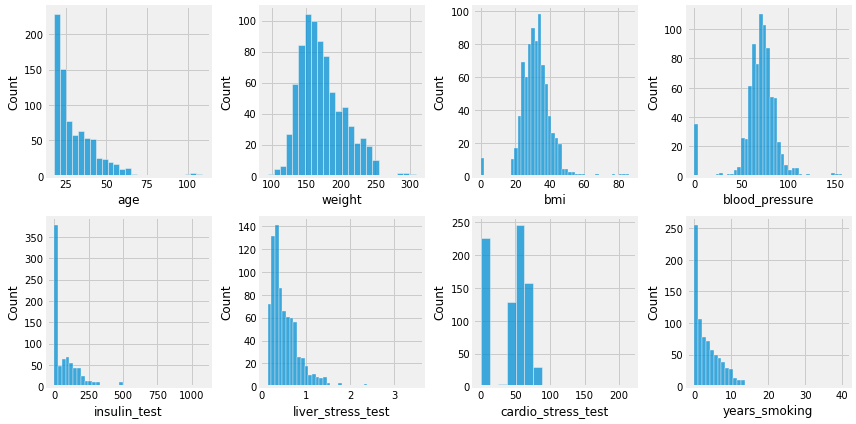

In [13]:
plt.figure(figsize = (12,6))
plt.subplot(2,4,1)
sns.histplot(x = 'age', data = training_data)

plt.subplot(2,4,2)
sns.histplot(x = 'weight', data = training_data)

plt.subplot(2,4,3)
sns.histplot(x = 'bmi', data = training_data)

plt.subplot(2,4,4)
sns.histplot(x = 'blood_pressure', data = training_data)

plt.subplot(2,4,5)
sns.histplot(x = 'insulin_test', data = training_data)

plt.subplot(2,4,6)
sns.histplot(x = 'liver_stress_test', data = training_data)

plt.subplot(2,4,7)
sns.histplot(x = 'cardio_stress_test', data = training_data)

plt.subplot(2,4,8)
sns.histplot(x = 'years_smoking', data = training_data)

plt.tight_layout()

#### The histograms of the features revealed some interesting findings: 
1. Many people have a value of '0' for the following features:
    1. cardio_stress_test
    2. insulin_test
    3. liver_stress_test
    4. blood pressure
    5. bmi 
2. Some of the features are fairly normally distributed, while others are right-skewed (more observations on the left end of the distribution). This phenomena was very present in the 'age' feature, telling us that the ages of people in the test data tend to be quite young. <br>

##### - We can reasonably assume that it's impossible to have values of 0 for cardio_stress_test, insulin_test, liver_stress_test, blood_pressure, and bmi, and can consider these '0' values to be NULL, i.e. the measurement was not gathered for that person. <br><br> - I will clean the data to remove columns in which we have values of zero for any of our features EXCEPT years_of_smoking, as zero should be a valid response for that feature  <br><br>

# Part 2: Data Cleaning and Feature Engineering

Here I've gone ahead and removed any rows from the training dataset where ANY of the aforementioned columns has a value of 0. In order to have the most effective predictive algorithm, I want to ensure that the data isn't skewed by considering any persons with missing values in these columns.

In [14]:
training_data = training_data.loc[training_data.cardio_stress_test * training_data.insulin_test * 
                                  training_data.liver_stress_test * training_data.blood_pressure * training_data.bmi != 0]

#by using the .loc() method from pandas, I can locate and remove all rows from my dataset where ANY of the listed columns have a value of zero.
#By simply taking the product and only retaining values where the product is not zero, we can clean the data efficiently

In [15]:
np.shape(training_data)

(429, 9)

##### As you can see, we now have 429 rows from the original 800 person dataset. 


Some things to consider regarding the way I cleaned my data: 
- The size of my dataset is quite small, so one could argue AGAINST removing these '0' values because their removal has nearly slashed my data in half
- IF I didn't remove rows where one or more of these columns had a 0 in it, the model could perform very poorly because the model interpretes each 0 as a true value, while in reality the value should likely be null, because things such as bmi and blood pressures cannot feasibly be zero. 

##### An alternative approach that could be considered: 
- It's fairly common practice to replace NULL and/or Zero-values with the mean of that particular feature. 
    - eg: If the age of an individual is NULL but the average age is 40, we will consider it to be 40

For the purposes of this analysis, I will AVOID this method, as I'm not entirely aware of the implications of such a method and how it will affect the model's performance. 

- **Thus, let's remove the rows with a value of zero for the features listed above, and move forward**

#### <br><br>Note that in the correlation matrix above, we saw that **weight** had the *strongest positive correlation with zeta_disease*, so I will go ahead and create plots to visualize the weight's of individuals WITH and WITHOUT the disease

<AxesSubplot:title={'center':'Violinplot distribution of weight; partitioned by Disease'}, xlabel='zeta_disease', ylabel='weight'>

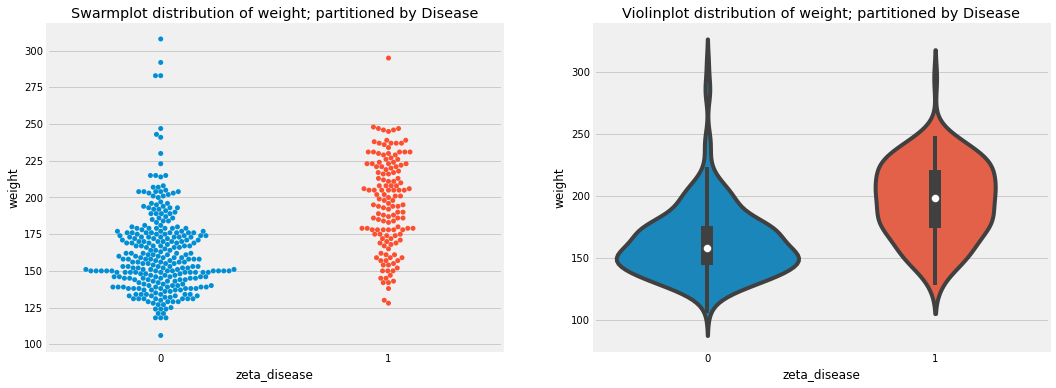

In [16]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.title('Swarmplot distribution of weight; partitioned by Disease')
sns.swarmplot(data = training_data, x = 'zeta_disease', y = 'weight')

plt.subplot(1,2,2)
plt.title('Violinplot distribution of weight; partitioned by Disease')
sns.violinplot(x = training_data.zeta_disease, y = training_data.weight)

#### Summary of swarmplot and violin plot above: 
- The first plot and second plot are two ways to visualize the distribution of a person's weight, and both plots are partitioned into groups that do NOT have the disease <font color = 'blue'>**(blue)**</font> and groups that DO have the disease <font color = 'red'>**(red).**</font> 
- We can see that on average, the weight of an individual will be higher when they have the disease. <BR><BR>

 #### Let's think of other ways in which I can clean and wrangle my data <br>

#### **As a quick reminder, here is the current format of the columns:**

#### Data Columns: 
1. **Age:** In Years
2. **Weight:** Body weight in pounds (lbs)
3. **BMI:** Body mass index (weight in KG/(height in Meters*2)
4. **Blood_pressure:** Resting blood pressure (mm Hg) i.e. millimetres of Mercury
5. **Insulin_test:** Insuling test value 
6. **liver_stress_test:** liver_stress_test value
7. **cardio_stress_test:** cardio_stress_test value 
8. **years_smoking:** Number of years smoking
9. **zeta_disease:** 1 = YES; 0 = NO


 Note that weight is in *pounds (lbs)* while bmi is in *kilograms/(meters $*$ 2)*. 
- Lets try converting the weight to kilograms
- Next, let's try manipulating the bmi column to extract a height in meters. 

In [17]:
#Here I place the kg_weight column at the 2nd index so it's right next to weight in lbs, to easily see that the values make sense
training_data.insert(2, 'kg_weight', training_data.weight/2.20462)

In [18]:
#Taking a glance at the newly created kg_weight column to make sure the conversion went as planned. 
training_data.head()

,age,weight,kg_weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
1,23,150,68.038936,38.5,68,71,0.3868,55,2,0
3,18,150,68.038936,30.8,70,1033,0.6598,56,0,0
4,24,160,72.574866,32.4,74,125,0.7608,59,2,0
6,20,154,69.853308,27.8,64,116,0.5168,53,0,0
7,37,167,75.750016,34.5,88,145,0.4658,54,1,1


**Now I create a height in meters column**<br> 
- The formula for bmi $=$ weight in lbs$/$(2$*$height in meters) <br> 
- We can manipulate this formula to extract height: <br>
    - height in meters $=$ weight in lbs$/$(2$*$bmi)

In [19]:
#turning the bmi column from the training data into a Series for easy manipulation
height = training_data.weight/(2*training_data.bmi)

In [20]:
height.describe()

count    429.000000
mean       2.717938
std        0.702725
min        0.848268
25%        2.203947
50%        2.603912
75%        3.177966
max        5.752033
dtype: float64

Do these height values *make sense*? Perhaps **not for humans**, but it's important to remember the context of this disease!
- After all, our median height in our dataset is ~2.6 meters
- We are dealing with Martians, and since these values are **derived from the bmi column that was already provided** (assumed to be correctly given values), we will consider these heights to be normal measurements.
    

In [21]:
#Now that I've used my bmi column to extract height in meters, and converted the weight from lbs to kilogram, we no longer need those columns.
#In fact, keeping them will cause issues with autocorrelation of features, which is highly undesirable
training_data.drop('weight', axis =1, inplace =True)
training_data.drop('bmi', axis =1, inplace = True)
training_data.insert(3, 'Height_meters', height)

In [22]:
#Confirming that we've removed the old weight column that uses lbs, and removed bmi, and extracted height in M from bmi. 
training_data.columns

Index(['age', 'kg_weight', 'blood_pressure', 'Height_meters', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

##### <br><br>Below is a new heatmap correlation plot to see if adjusting our weight to kg and using height in Meters in favor of bmi will yield new insights. 

<AxesSubplot:>

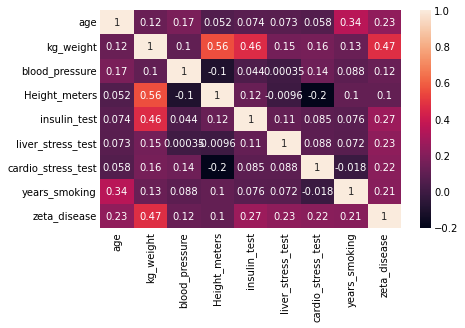

In [23]:
sns.heatmap(training_data.corr(), annot = True)

It appears that our kg_weight column has a fair positive correlation with insulin_test and height_meters, the latter of which is expected as the height column was derived from bmi, which used weight in its calculation
- Note that we still have no features i.e. independent variables that have correlations high enough to raise concerns about autocorrelation
- The correlation between kg_weight and zeta_disease is the SAME as the correlation was between weight (lbs) and zeta_disease, so no conversion mistake was made

**You may remember that I made a copy of the original, unaltered training dataset when I first created my dataframes. Lets look at the correlation plot of that dataset to compare it to the one picture aboved to see the key difference**

<AxesSubplot:>

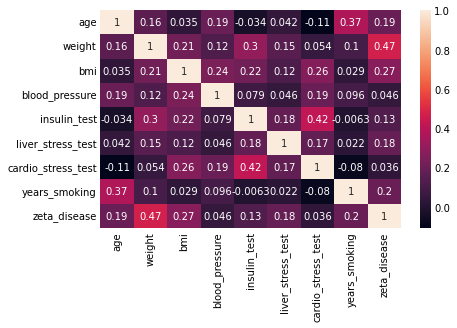

In [24]:
sns.heatmap(initial_training_data_copy.corr(), annot = True)

The right-most column is of greatest interest to us because it shows the linear correlation between features and the response variable, zeta_disease, so let's take a look at it. 
- We can see that the correlations between the response variable and some features such as cardio_stress_test and insulin_test amongst others have increased, which is a sign that cleaning and manipulating the original data was beneficial as it allows us to make connections more easily.

**This concludes the Data Cleaning and Feature Engineering portion of this analysis. Now we are ready to choose and fit a predictive model** <br><br><br>


# Part 3: Predictive Modeling 

Some of the *most common* Machine Learning algorithms include:
- **Logistic Regression**
- **KNN (K-nearest-neighbors)**
- **Random Forests**
- **SVM (Support Vector Machines)**
- **Naive Bayes**
- **Stochastic Gradient Descent**

Each of these algorithms have their pros and cons and there are cases when there is little to no clear distinction when it comes to determining which model to use.
- Of the Models, I have chosen to use **Logistic Regression** <BR><BR>


### Naturally, this begs the question "Why logistic regression over any of the other models you listed?" <br>

#### Logistic Regression models have **requirements** which need to be met in order for the model to be effective such as: 
- Binary logistic regression requires the dependent variable to be binary, and zeta_disease is in fact a binary dependent variable
- The observations should be independent of one another
    - Seeing as each of these observations in our dataset is a **different** individual, observations are assumed to be independent. 
    - We could **not** make this conclusion if, for example, each observation was data regarding the same individual recorded at different times as the records would be dependent
- Features should not be highly correlated with one another <br><br><br>



The data that I've cleaned and analyzed meets all of the above assumptions of logistic regression, and logistic regression models are specifically created for classification problems, while some other Machine Learning algorithms are suited for both classification and regression. 

**Thus, I've chosen to fit my data using a Logistic Regression Model**

Note: One fallback of Logistic Regression models is that they tend to perform better i.e. provide more accurate classifications when the training dataset is very large, while my dataset is not particularly large, especially after removing nearly half of the observations due to NULL values

## **Here's a quick overview of how the Logistic Regression Models works in Binary Classification:** 

Although Logistic Regression can be used for multinomial (3 or more) classification, let's consider the binary classification that we're dealing with, in which an outcome is **only** able to be 1 (person has disease), or 0 (no disease). The Logistic classification models aims to use the feature variables to predict whether a person will or will not have the disease, and this estimation of the response variable is called y-hat (i.e. the **predicted value of the response variable**)
- In order to classify a datapoint as a 1 or a zero, we use the log-odds ratio to obtain a value for each datapoint. 
    - This value is mapped to the Sigmoid function (seen below) and is assigned a value of 0 or 1 depending on the following:
        1. **The cutoff value:** (i.e. will we consider a value of >=0.6 to be a 1, and <0.6 to be a zero?) ; Typically the cutoff is the middle at 0.5
        2.**The calculated log odds value**

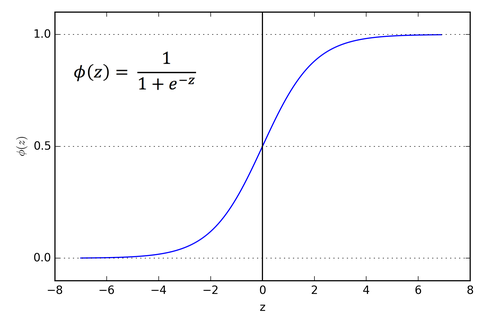

Now that some preliminary information has been provided, let's continue to the modeling

### **Importing additional libraries for creating my model**

In [25]:
#Here are some libraries that I will use for my model. 

#The reason I import them here rather than at the top of the notebook with other Libraries is to make is CLEAR where they are used. 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


In [26]:
#Verify that I'm working with the training_data that has been reduced from the original 800 rows
training_data.shape

(429, 9)

## READ THIS FOR CLARITY

Note that at the start of the notebook I created two pandas dataframes called 'training_data' and 'model_testing_data' in addition to a copy of the first dataset incase I wanted to refer back to it. Rather than training my logistic classification model on my 429 remaining observations (After cleaning null values), and then using my model to predict the presence or lack thereof of Zeta_disease on the testing_data (only 20 observations), I will proceed to split my training data into a roughly 80/20 split of train vs. test data so that I can fit my model, tune parameters if necessary, and assess the accuracy of the model before fitting it to the unlabeled test data of only 20 observations. 

This is done such that I don't blindly fit my model onto the 20 rows of test data, as there is no way for me to validate the efficacy of the model. 

Incase you are curious, the justification for splitting my 429 rows into 80% for training and 20% for testing is because this ratio is very commonly used when fitting Machine Learning Models. In general, you would like to train your model on as many data points as possible, yet still have adequate data to evaluate the efficacy of the model.

**TO CLARIFY ONCE MORE, MY ENTIRE PROCEDURE IS AS FOLLOWS**
- Import training data (800 rows; labeled response variable)
- Import test data (20 rows, unlabeled response variable)
- Clean the training data (429 rows remain)
    - Split the training data such that 80% can be used to train the Logistic classification model, and another 20% can be used to test it.
    - Evaluate relevant metrics of the model such as:
        - **Accuracy:** (True positives+True negatives)/Total
        - **Precision:** (True positives/Number of predicted Yes's)
        - **Recall/Sensitivity:** True positives/(True positive + False Negatives)
        - **F1-Score:** (2$*$Precision$*$Recall)/(Precision+Recall)
    - Determine if the model is satifactory, or requires more tuning  <br><br><br><br>
        

# **Logistic Classification Model Implementation**

In [27]:
#Using functions from sklearn
lr = LogisticRegression() 
#Placing all of my features into the columns variable
columns = ['age', 'kg_weight', 'blood_pressure', 'Height_meters', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']

In [28]:
#y is the reponse variable, while X is a matrix containing the remaining columns.
#It's standard procedure to use this naming method: Place all the independent features in a dataframe called X, and the response in y. 
X = training_data[columns]
y = training_data['zeta_disease']

train_X, val_X, train_y, val_y = train_test_split(X,y,test_size = 0.20, random_state = 111)

#Here a function is used to split the data into an 80:20 split between training and testing.
#Random state is used for reproducibility of results

#### Checking to make sure that the shape of the data as well as the data itself looks as expected 

In [29]:
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((343, 8), (86, 8), (343,), (86,))

In [30]:
train_X.head()

,age,kg_weight,blood_pressure,Height_meters,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
136,52,111.130263,70,4.880478,145,0.2258,63,7
564,31,78.471573,72,2.574405,230,0.7958,75,6
10,25,80.285945,88,2.565217,155,0.6608,41,4
39,33,65.770972,74,2.799228,73,0.7358,51,1
312,35,104.779962,64,3.387097,180,0.3908,60,1


In [31]:
val_X.head()

,age,kg_weight,blood_pressure,Height_meters,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
450,27,78.925166,68,2.644377,205,0.9378,58,2
47,39,84.368281,84,3.286219,130,0.3228,65,11
386,18,71.667680,62,3.134921,56,0.1908,62,2
369,34,75.296423,72,3.755656,87,0.5258,42,4
180,19,71.667680,62,3.122530,278,0.9438,40,2


In [32]:
train_y.head()

136    1
564    0
10     0
39     0
312    1
Name: zeta_disease, dtype: int64

In [33]:
val_y.head()

450    1
47     1
386    0
369    0
180    0
Name: zeta_disease, dtype: int64

In [34]:
#Fitting the first iteration of my model: Note that I've started by including all independent variables in my model.

In [35]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y, predictions)
print('The Accuracy is: ', accuracy)

The Accuracy is:  0.7209302325581395


In [36]:
from sklearn.metrics import classification_report
print(classification_report(val_y, predictions))

#Here we can see some metrics mentioned earlier such as precision, recall, and f1-score. These give me an idea of the model's performance.

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        62
           1       0.50      0.38      0.43        24

    accuracy                           0.72        86
   macro avg       0.64      0.61      0.62        86
weighted avg       0.70      0.72      0.71        86



### K-Fold Cross Validation: 
- K-fold cross validation is a resampling method in which we re-evaluate the model after changing which 80% of the data is selected for training, and which 20% is allocated for testing.

- This is particularly useful when the size of our dataset is quite small, and we want better evaluations of the model's accuracy. 
- 5 folds, or 5 iterations, is a common level of groups to use so I've gone ahead and evaluated the model 5 times with different subsets of the training data, and taken the mean of the accuracy and printed it below. 

In [37]:
lr = LogisticRegression()
scores = cross_val_score(lr,X,y, cv=5)
scores.sort()
accuracy=scores.mean()

print('Scores: ', scores)
print('-----------------------------------------------------')
print('Accuracy: ', accuracy)

Scores:  [0.73255814 0.75581395 0.77906977 0.77906977 0.78823529]
-----------------------------------------------------
Accuracy:  0.7669493844049248


- We can see that the Average Accuracy of the model (True positive + True negative)/Total observations is **~76.69%.** <br> 
- This is certainly better than random guessing, and can be considered "quite good", but not exceptional. 

<br><br>

## Making Predictions on my ACTUAL TEST DATA: 

(20 observations with unlabeled zeta_disease response variable) 

### Below are the same manipulations that I did to my training data that must be repeated to my TEST data: 

1. Here's a recap: 
        - Convert weight in lbs to kg
        - Turn the bmi column into Height.
            - The reasoning behind this is that Height in Meters can be directly derived from the bmi, and height is generally easier to comprehend. 
            - We do not lose any information regarding the bmi, as it is simply derived from the metric height and weight. 

#### **The manipulations are mentioned because they must be done on my Test data as well for the model to work** 

In [38]:
model_testing_data.insert(2, 'kg_weight', model_testing_data.weight/2.20462)
#Adding the weight in kilos

In [39]:
height_testing = model_testing_data.weight/(2*model_testing_data.bmi)
#Creating a Series for height in meters, derived from the bmi column. 

In [40]:
model_testing_data.insert(4, 'Height_meters', height_testing)
#inserting new col

In [41]:
model_testing_data.drop(['weight','bmi'], axis =1, inplace = True)
#removing weight in lbs and bmi cols

In [42]:
model_testing_data.head()

,age,kg_weight,Height_meters,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24.0,68.492529,1.911392,69.0,72.0,1.3968,56.0,4.0,NaN
1,27.0,81.193131,2.521127,89.0,156.0,1.6608,43.0,6.0,NaN
2,34.0,66.678158,2.732342,76.0,74.0,1.6958,53.0,2.0,NaN
3,35.0,93.440139,3.179012,73.0,127.0,1.4608,61.0,6.0,NaN
4,60.0,87.543432,3.238255,62.0,192.0,1.7798,65.0,9.0,NaN


# **Here are the model's predictions of zeta_disease in the Test data**

In [43]:
lr = LogisticRegression()
lr.fit(X,y)
predictions_test = lr.predict(model_testing_data[columns])

In [44]:
predictions_test.sum()

17

In [45]:
predictions_test

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

#### **According to these predictions, the Test data would look like this:**

In [46]:
model_testing_data['zeta_disease'] = predictions_test
model_testing_data

,age,kg_weight,Height_meters,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24.0,68.492529,1.911392,69.0,72.0,1.3968,56.0,4.0,1
1,27.0,81.193131,2.521127,89.0,156.0,1.6608,43.0,6.0,1
2,34.0,66.678158,2.732342,76.0,74.0,1.6958,53.0,2.0,0
3,35.0,93.440139,3.179012,73.0,127.0,1.4608,61.0,6.0,1
4,60.0,87.543432,3.238255,62.0,192.0,1.7798,65.0,9.0,1
5,45.0,54.431149,1.643836,108.0,50.0,1.2978,54.0,12.0,0
6,20.0,63.049414,1.819372,61.0,77.0,1.5818,68.0,3.0,1
7,23.0,62.142229,2.195513,70.0,73.0,1.4168,59.0,7.0,0
8,36.0,88.450617,3.196721,59.0,141.0,1.4498,59.0,6.0,1
9,19.0,87.543432,3.740310,84.0,66.0,1.7938,50.0,3.0,1


## Result Summary, and why **I am skeptical** of the model's output

We see that 17 of 20 rows are predicted to have the disease. This results COULD be correct, but I have reason to be very skeptical of the results for the following reasons: <br>
    1. The prevalence of zeta_disease in the original, uncleaned dataset containing 800 rows was 279/800 or **34.875%** <br>
        2. After cleaning the data and removing Zeros where we deemed they did not belong and the data should be NULL, there were a remaining 429 rows, of which 143 had the disease, or **33.33%**

**Under the assumption of random sampling** of the Test data, it would be very strange that 85% or 17/20 of the individuals are classified as having the disease, when both the uncleaned and cleaned training data suggest that the disease, on average, is much less prevalent. 

- Remember the original correlation matrix that I plotted? It showed that several features had little to no positive linear correlation with the response variable, and my decision to include them in my Logistic regression model could be negatively impacting the performance. 

**Now I will investigate further and considering performing feature selection to improve the model and get new predictions for the Test data: See histograms below**

Here I demonstrate the prevalance of zeta_disease in my uncleaned and cleaned training data 

In [47]:
uncleaned_disease_count = initial_training_data_copy.zeta_disease.sum()
uncleaned_disease_count

279

In [48]:
uncleaned_disease_count/len(initial_training_data_copy)*100

34.875

In [49]:
training_data.zeta_disease.value_counts()

0    286
1    143
Name: zeta_disease, dtype: int64

In [50]:
143/429

0.3333333333333333

In [51]:
predictions_test.sum()

17

In [52]:
training_data.zeta_disease.sum()

143

In [53]:
143/429

0.3333333333333333

### Histograms of all features of the Test data. Looking for potential anomalies or clear distribution differences between Training and Testing data

In [54]:
#Reading in a clean copy of the testdata 
untouched_testdata = pd.read_excel('/Users/Scott/Downloads/zeta_prediction_testing_data.xlsx')
untouched_testdata.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

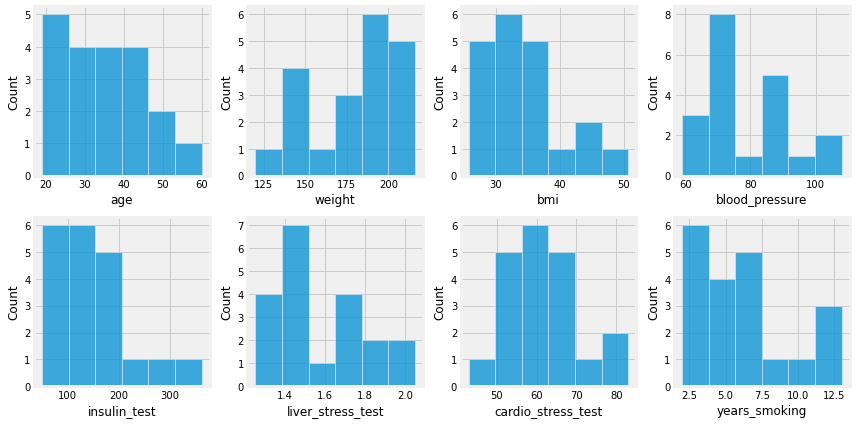

In [55]:
plt.figure(figsize = (12,6))
plt.subplot(2,4,1)
sns.histplot(x = 'age', data = untouched_testdata)

plt.subplot(2,4,2)
sns.histplot(x = 'weight', data = untouched_testdata)

plt.subplot(2,4,3)
sns.histplot(x = 'bmi', data = untouched_testdata)

plt.subplot(2,4,4)
sns.histplot(x = 'blood_pressure', data = untouched_testdata)

plt.subplot(2,4,5)
sns.histplot(x = 'insulin_test', data = untouched_testdata)

plt.subplot(2,4,6)
sns.histplot(x = 'liver_stress_test', data = untouched_testdata)

plt.subplot(2,4,7)
sns.histplot(x = 'cardio_stress_test', data = untouched_testdata)

plt.subplot(2,4,8)
sns.histplot(x = 'years_smoking', data = untouched_testdata)

plt.tight_layout()

### A quick glance at these histograms does **not** tell me that any of their distributions are immediately concerning, Let's dive deeper. <br><br>

# TESTING OUT Logit Model for feature selection: Trying to improve model

- Note that just like Machine learning algorithms, there are many methods available for improving models and selecting features such as L1 regularization, L2 regularization, etc. 
- The reason I've chosen to use the Logit model is that it's both easy to implement and understanding it is quite intuitive.

The Logit Model is a model which selects features (independent variables) based on the p-value scores of the feature. 
- The lower the p-value, the more significant the feature is with respect the predicting the response variable. 

In [56]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.541158
         Iterations 6
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.150     
Dependent Variable:  zeta_disease     AIC:              480.3137  
Date:                2022-09-23 17:34 BIC:              512.8054  
No. Observations:    429              Log-Likelihood:   -232.16   
Df Model:            7                LL-Null:          -273.06   
Df Residuals:        421              LLR p-value:      5.8699e-15
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
age                 0.0186   0.0084  2.2297 0.0258  0.0023  0.0350
kg_weight           0.0711   0.0125  5.6853 0.0000  0

In [57]:
training_data.columns

Index(['age', 'kg_weight', 'blood_pressure', 'Height_meters', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [58]:
#Dropping the features that the Logit model deemed to be insignificant
feature_selected_data = training_data.drop(['insulin_test', 'liver_stress_test', 'cardio_stress_test'], axis=1)

In [59]:
feature_selected_data

,age,kg_weight,blood_pressure,Height_meters,years_smoking,zeta_disease
1,23,68.038936,68,1.948052,2,0
3,18,68.038936,70,2.435065,0,0
4,24,72.574866,74,2.469136,2,0
6,20,69.853308,64,2.769784,0,0
7,37,75.750016,88,2.420290,1,1
...,...,...,...,...,...,...
792,56,108.408705,60,3.970100,1,1
793,22,53.523963,70,2.360000,2,0
794,46,79.832352,88,2.285714,8,0
795,26,73.028458,90,2.834507,3,0


### **Now I try the Logistic Regression again using this subset of features**

In [76]:
columns = ['age','kg_weight', 'blood_pressure', 'Height_meters', 'years_smoking']

In [77]:
X = feature_selected_data[columns]
y = feature_selected_data['zeta_disease']

train_X, val_X, train_y, val_y = train_test_split(X,y,test_size = 0.20, random_state = 500)

In [82]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y, predictions) 
print(accuracy)

print(classification_report(val_y, predictions))

0.7325581395348837
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        51
           1       0.73      0.54      0.62        35

    accuracy                           0.73        86
   macro avg       0.73      0.70      0.71        86
weighted avg       0.73      0.73      0.72        86



Above I have printed out a report that tells us the precision, recall, and f1-score of the Model on the Training data.

For reference: Here is some useful terminology: <br>
  <br>  **Precision**: True Positive/(True positive+false positive)
   <br> **Recall/Sensitivity**: True Positive/(True Positive + False Negative). This is *also equal to* 1-Type 2 error
   <br> **F-1 Score:** (2*Precision*Recall)/(Precision+Recall) 
   <br> **Type 1 error**: False positive (i.e. We predict the value to be positive when the real value is negative)
  <br>  **Type 2 error**: False Negative (i.e. We predict a negative when the real value is positive)

In [84]:
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=5)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.74418605 0.76744186 0.77906977 0.78823529 0.79069767]
0.7739261285909713


#### Note that performing k-fold classification (5 folds in this case) Improved the accuracy of the model from ~73% to ~77%

In [87]:
lr = LogisticRegression()
lr.fit(X,y)
predictions_test= lr.predict(model_testing_data[columns])

In [88]:
predictions_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [89]:
predictions_test.sum()

7

#### Making sure I have a clean copy of the Testing dataset. This is a safety measure in-case it has been manipulated at some point or I've lost track of any changes. 

In [90]:
final_results = pd.read_excel('/Users/Scott/Downloads/zeta_prediction_testing_data.xlsx')

In [91]:
final_results.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24.0,151.0,39.5,69.0,72.0,1.3968,56.0,4.0,NaN
1,27.0,179.0,35.5,89.0,156.0,1.6608,43.0,6.0,NaN
2,34.0,147.0,26.9,76.0,74.0,1.6958,53.0,2.0,NaN
3,35.0,206.0,32.4,73.0,127.0,1.4608,61.0,6.0,NaN
4,60.0,193.0,29.8,62.0,192.0,1.7798,65.0,9.0,NaN


**Now I simply replace the 'NaN' values in the zeta_disease with the predictions from my model.** 

In [92]:
final_results.zeta_disease = predictions_test
final_results

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24.0,151.0,39.5,69.0,72.0,1.3968,56.0,4.0,0
1,27.0,179.0,35.5,89.0,156.0,1.6608,43.0,6.0,0
2,34.0,147.0,26.9,76.0,74.0,1.6958,53.0,2.0,0
3,35.0,206.0,32.4,73.0,127.0,1.4608,61.0,6.0,1
4,60.0,193.0,29.8,62.0,192.0,1.7798,65.0,9.0,1
5,45.0,120.0,36.5,108.0,50.0,1.2978,54.0,12.0,0
6,20.0,139.0,38.2,61.0,77.0,1.5818,68.0,3.0,0
7,23.0,137.0,31.2,70.0,73.0,1.4168,59.0,7.0,0
8,36.0,195.0,30.5,59.0,141.0,1.4498,59.0,6.0,0
9,19.0,193.0,25.8,84.0,66.0,1.7938,50.0,3.0,0


Comparing the correlation matrix of the cleaned training data vs the test data with predictions for the zeta_disease response variable. 
- Im curious to see if the Test data's features and their correlation with zeta_disease are similar to the correlations seen in the Training data.
- Naturally, they will not be exactly the same, but I'm looking for glaring discrepancies.

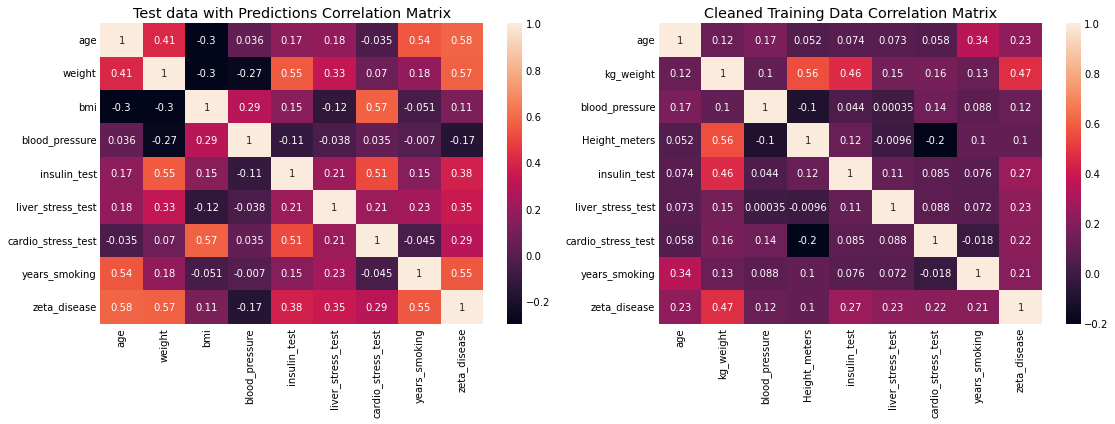

In [93]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.heatmap(final_results.corr(), annot = True)
plt.title('Test data with Predictions Correlation Matrix')
plt.subplot(1,2,2)
sns.heatmap(training_data.corr(),annot=True)
plt.title('Cleaned Training Data Correlation Matrix')
plt.tight_layout()

##### At this stage I believe my Model is satisfactory and I'm glad to see that now we are only predicting zeta_disease in 7 of the 20 unlabeled people, indicating a percentage of 35%. <br> 
- This figure is similar to the prevalance of zeta_disease in both my uncleaned and cleaned training data. <br> 
- Although this is not a tell-tale sign that the predictions are correct or mostly correct, I am much less skeptical of this model's performance than the initial variant that predicted **Yes** in 17/20 cases. 

# **Summary**

After exploratory data analysis on my training data revealed a lack of correlation between some features and the response, I decided to plot histograms of each of the features to identify patterns.
- I noticed many values of '0' in several of the features, and cleaned my data by removing rows where a value of 0 was present in features where a 0 should not be possible such as blood_pressure and bmi
- I fitted a logistic regression model to the data to predict whether or not a person would or would not have the disease.
    1. After getting strange results, I decided to use a method of feature selection to limit the amount of regressors in my model, and refit the model to my testing data

**The final model uses the independent variables of 'age','kg_weight', 'blood_pressure', 'Height_meters', 'years_smoking' to predict a binary classification of 1 (has disease) or 0 (no disease) in the unlabeled data containing 20 individuals.**
- Outcome: 7 Yes; 13 No 
- Model Accuracy during Training: **77.3926%**
## **I am left with the final results as shown below**

In [71]:
final_results

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24.0,151.0,39.5,69.0,72.0,1.3968,56.0,4.0,0
1,27.0,179.0,35.5,89.0,156.0,1.6608,43.0,6.0,0
2,34.0,147.0,26.9,76.0,74.0,1.6958,53.0,2.0,0
3,35.0,206.0,32.4,73.0,127.0,1.4608,61.0,6.0,1
4,60.0,193.0,29.8,62.0,192.0,1.7798,65.0,9.0,1
5,45.0,120.0,36.5,108.0,50.0,1.2978,54.0,12.0,0
6,20.0,139.0,38.2,61.0,77.0,1.5818,68.0,3.0,0
7,23.0,137.0,31.2,70.0,73.0,1.4168,59.0,7.0,0
8,36.0,195.0,30.5,59.0,141.0,1.4498,59.0,6.0,0
9,19.0,193.0,25.8,84.0,66.0,1.7938,50.0,3.0,0
